In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import datetime as dt
import matplotlib.dates as mdates
import numpy as np
from scipy.signal import argrelextrema

In [102]:
path = 'C:/Users/LENOVO/OneDrive/WaterSprint/ADB Project/DataSet Comparison/Discharge/'

In [103]:
df = pd.read_csv(path+'/graphs/FinalData.csv')
df['date'] = pd.to_datetime(df['date'],format='%d-%m-%y')

In [104]:
df

,date,Unnamed: 1,year,KH1,KH2,KR,KNH,KM,CHD,Kaha,Chachar,ERA5_KAHA,ERA5_CHD
0,2010-01-01,0:00:00,2010.0,0.029304,0.473359,0.490929,0.490797,0.360309,0.044060,0.0,0.0,2.732535,9.020000e-27
1,2010-01-02,0:00:00,2010.0,0.029170,0.467123,0.485586,0.485235,0.352993,0.043788,0.0,0.0,2.224361,4.260000e-26
2,2010-01-03,0:00:00,2010.0,0.028649,0.459242,0.477236,0.476960,0.347054,0.043482,0.0,0.0,1.282073,1.208780e-04
3,2010-01-04,0:00:00,2010.0,0.028266,0.453074,0.470817,0.470583,0.342734,0.042950,0.0,0.0,0.897411,3.306800e-04
4,2010-01-05,0:00:00,2010.0,0.028359,0.448863,0.466301,0.466132,0.340065,0.042740,0.0,0.0,0.917640,1.902470e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15334,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.103352e-02
15335,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.104874e-02
15336,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.102715e-02
15337,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.311815e-01


In [105]:
# df = df.fillna(0)
# df['Observed_Cumecs_K'] = df['Kaha']/35.4
# df['Observed_Cumecs_C'] = df['Chachar']/35.4

In [106]:
# df1 = pd.read_csv(path+'Wflow(1981-2022).csv')
# df1['Dates'] = pd.to_datetime(df['Dates'],format='%d-%m-%y')

In [107]:
start_date = '01-01-2014'
end_date = '31-12-2014'
df1 = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

C:\Anaconda\envs\infarmer_env\lib\site-packages\pandas\core\arraylike.py:52: UserWarning: Parsing '31-12-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.le)


In [108]:
start_date = '01-01-2015'
end_date = '31-12-2015'
df2 = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

C:\Anaconda\envs\infarmer_env\lib\site-packages\pandas\core\arraylike.py:52: UserWarning: Parsing '31-12-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.le)


In [109]:
start_date = '01-01-2016'
end_date = '31-12-2016'
df3 = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

C:\Anaconda\envs\infarmer_env\lib\site-packages\pandas\core\arraylike.py:52: UserWarning: Parsing '31-12-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.le)


In [110]:
start_date = '01-01-2017'
end_date = '31-12-2017'
df4 = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

C:\Anaconda\envs\infarmer_env\lib\site-packages\pandas\core\arraylike.py:52: UserWarning: Parsing '31-12-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.le)


In [111]:
start_date = '01-01-2018'
end_date = '31-12-2018'
df5 = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

C:\Anaconda\envs\infarmer_env\lib\site-packages\pandas\core\arraylike.py:52: UserWarning: Parsing '31-12-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.le)


In [112]:
start_date = '01-01-2022'
end_date = '31-12-2022'
df6 = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

C:\Anaconda\envs\infarmer_env\lib\site-packages\pandas\core\arraylike.py:52: UserWarning: Parsing '31-12-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.le)


In [113]:
# df.to_csv(path+'Corrected.csv')

In [81]:
df1['KH2'].max()

616.4994439

Text(0.5, 0, 'Time')

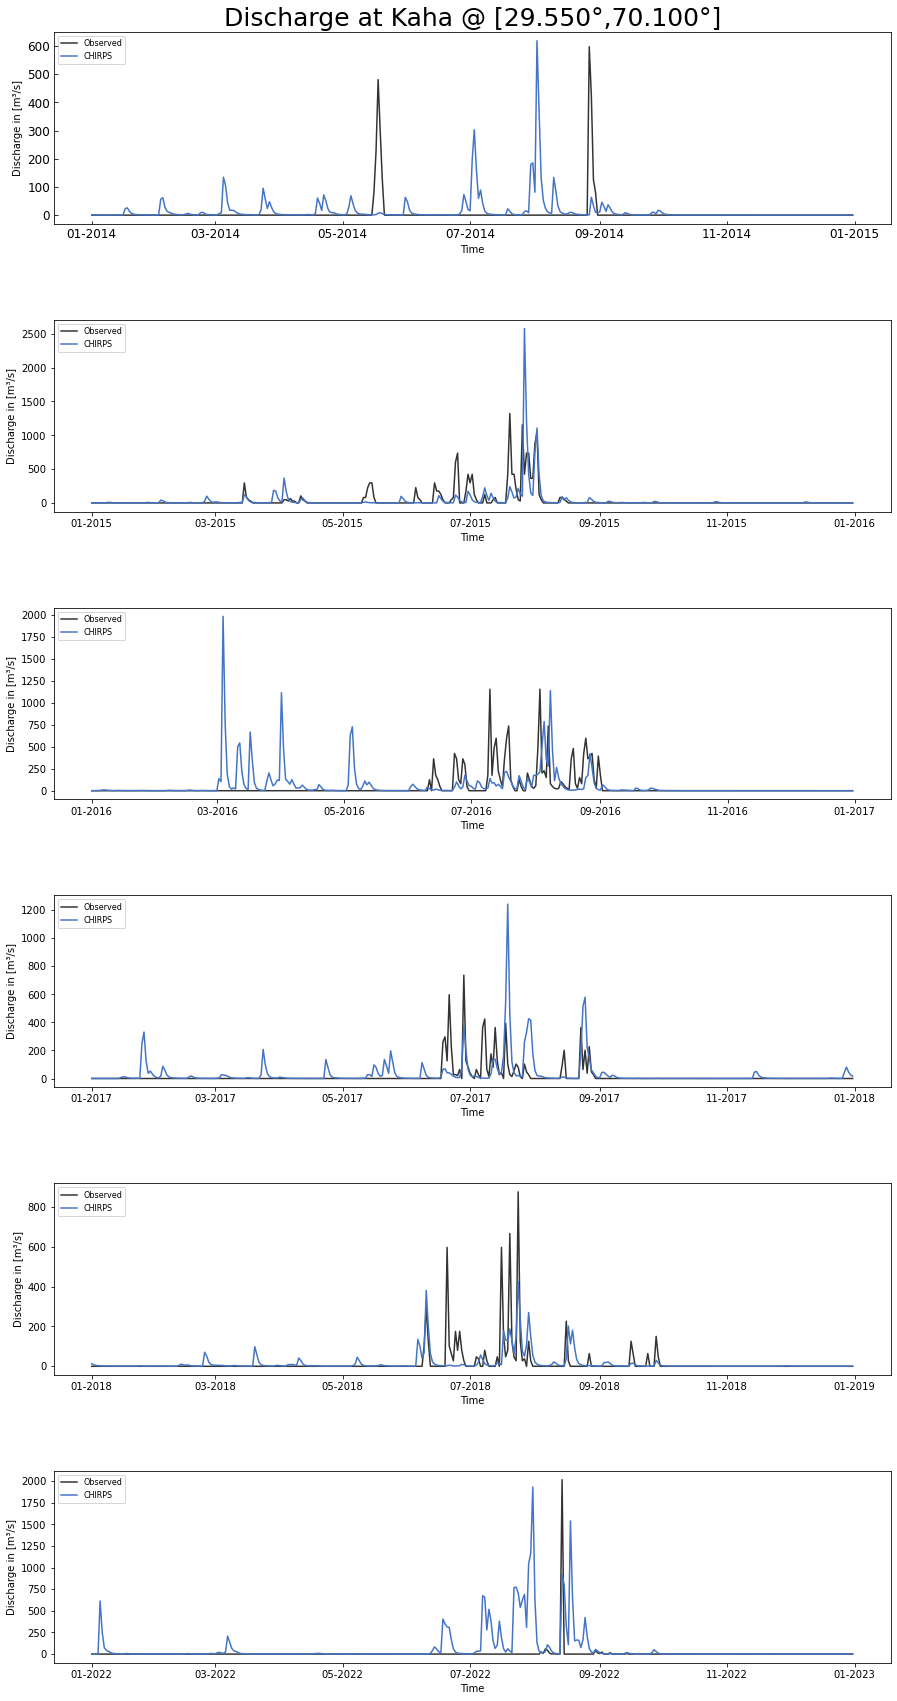

In [124]:

fig, axs = plt.subplots(nrows=6,ncols=1,figsize=(15, 30))


fig.subplots_adjust(hspace=0.5)

date_fmt = mdates.DateFormatter('%m-%Y')
# axs.xaxis.set_major_locator(locator)

#Observed
K1 = 'Kaha'
#ERA5
K2= 'ERA5_KAHA'
#CHIRP
K3= 'KR'
#Transparency Control for Observed
alpha=0.8
#Fontsize xlabels
fontx=10
#Fontsize ylabels
fonty=10




# axs.plot(df['date'],df['Kaha'],label='Observed',color='black',alpha=0.6) # darkblue color code '#1f77b4
axs[0].plot(df1['date'],df1[K1],label='Observed',color='black',alpha=alpha)      #red color code #f04440
# axs[0].plot(df1['date'],df1[K2],label='ERA5',color='#f04440')      #red color code #f04440
axs[0].plot(df1['date'],df1[K3],label='CHIRPS',color='#4474c6')      #red color code #f04440

axs[1].plot(df2['date'],df2[K1],label='Observed',color='black',alpha=alpha)      #red color code #f04440
# axs[1].plot(df2['date'],df2[K2],label='ERA5',color='#f04440')      #red color code #f04440
axs[1].plot(df2['date'],df2[K3],label='CHIRPS',color='#4474c6')      #red color code #f04440

axs[2].plot(df3['date'],df3[K1],label='Observed',color='black',alpha=alpha)      #red color code #f04440
# axs[2].plot(df3['date'],df3[K2],label='ERA5',color='#f04440')      #red color code #f04440
axs[2].plot(df3['date'],df3[K3],label='CHIRPS',color='#4474c6')      #red color code #f04440

axs[3].plot(df4['date'],df4[K1],label='Observed',color='black',alpha=alpha)      #red color code #f04440
# axs[3].plot(df4['date'],df4[K2],label='ERA5',color='#f04440')      #red color code #f04440
axs[3].plot(df4['date'],df4[K3],label='CHIRPS',color='#4474c6')      #red color code #f04440

axs[4].plot(df5['date'],df5[K1],label='Observed',color='black',alpha=alpha)      #red color code #f04440
# axs[4].plot(df5['date'],df5[K2],label='ERA5',color='#f04440')      #red color code #f04440
axs[4].plot(df5['date'],df5[K3],label='CHIRPS',color='#4474c6')      #red color code #f04440

axs[5].plot(df6['date'],df6[K1],label='Observed',color='black',alpha=alpha)      #red color code #f04440
# axs[5].plot(df6['date'],df6[K2],label='ERA5',color='#f04440')      #red color code #f04440
axs[5].plot(df6['date'],df6[K3],label='CHIRPS',color='#4474c6')      #red color code #f04440


# axs.plot(df1['Dates'],df1['Observed_Cumecs'],color='black',alpha=0.6) # darkblue color code '#1f77b4'
# axs.plot(df1['Dates'],df1['KH2'],color='#4474c6')      #red color code #f04440



axs[0].legend(loc='upper left',fontsize='8')
axs[1].legend(loc='upper left',fontsize='8')
axs[2].legend(loc='upper left',fontsize='8')
axs[3].legend(loc='upper left',fontsize='8')
axs[4].legend(loc='upper left',fontsize='8')
axs[5].legend(loc='upper left',fontsize='8')
    
axs[0].xaxis.set_major_formatter(date_fmt)
axs[1].xaxis.set_major_formatter(date_fmt)
axs[2].xaxis.set_major_formatter(date_fmt)
axs[3].xaxis.set_major_formatter(date_fmt)
axs[4].xaxis.set_major_formatter(date_fmt)
axs[5].xaxis.set_major_formatter(date_fmt)



#Changes the number of xticks visible
# locator = mdates.AutoDateLocator(minticks=50,maxticks=10)
# locator = mdates.AutoDateLocator()

axs[0].tick_params(axis='x', labelsize=12,direction='in')
axs[0].tick_params(axis='y', labelsize=12,direction='in')
# axs.set_yticks(range(0,110000, 10000))
# axs[0].set_title('Discharge at KH1 @ [29.350°,69.815°]',fontsize='40')
axs[0].set_title('Discharge at Kaha @ [29.550°,70.100°]',fontsize='25')
# axs[0].set_title('Discharge at KH2 @ [29.587°,69.884°]',fontsize='40')

axs[0].set_ylabel('Discharge in [m³/s]',fontsize=fonty)
axs[1].set_ylabel('Discharge in [m³/s]',fontsize=fonty)
axs[2].set_ylabel('Discharge in [m³/s]',fontsize=fonty)
axs[3].set_ylabel('Discharge in [m³/s]',fontsize=fonty)
axs[4].set_ylabel('Discharge in [m³/s]',fontsize=fonty)
axs[5].set_ylabel('Discharge in [m³/s]',fontsize=fonty)


axs[0].set_xlabel('Time',fontsize=fontx)
axs[1].set_xlabel('Time',fontsize=fontx)
axs[2].set_xlabel('Time',fontsize=fontx)
axs[3].set_xlabel('Time',fontsize=fontx)
axs[4].set_xlabel('Time',fontsize=fontx)
axs[5].set_xlabel('Time',fontsize=fontx)

# axs[0].xaxis.set_major_locator(mdates.YearLocator(1))
# axs[1].xaxis.set_major_locator(mdates.YearLocator(1))
# axs[2].xaxis.set_major_locator(mdates.YearLocator(1))

In [126]:
fig.savefig(path+'graphs/Kaha_CHIRP_OBS_2014-2022subplots.png')